<header style="background-color:#98E847; padding:20px; border-radius:20px;">
    <h1 style="font-family:newtimeroman; font-size:350%; color:Black; text-align:center;">
        Unemployment_Analyst_Using_Python
    </h1>
    <div class="image-container" style="text-align:center; margin-top:20px;">
        <img src="unemployment.webp" alt="Unemployement" style="border-radius:15px; max-width:80%;">
    </div>
</header>


Dataset used : Unemployment_Rate_upto_11_2020.csv

Data set contains :
Date : 31/01/20 - 31/10/2020

Shape : 267,9

1.Andhra pradesh , 2. Assam , 3. Bihar , 4. Chhattisgarh , 5. Delhi , 5. Goa 6.Gujrat , 8. Haryana , 9. Himachal Pradesh , 10. Jammu & Kashmir , 11.Jharkhand , 12. Karnataka , 13. Kerala 14. Madhya Pradesh , 15. Maharashtra , 16.Meghalaya , 17. Odisha , 18. Puducherry , 19. Punjab, 20. Rajasthan, 21.Sikkim , 22. Tamil Nadu , 23. Telangana , 24. Tripura , 25. Uttar Pradesh, 26.Uttarakhand , 27. West Bengal

### Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as ps
%matplotlib inline

### Dataset Loading :

In [2]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020 - Unemployment_Rate_upto_11_2020.csv')


#### Exploratory Data Analysis (EDA):

In [3]:
df.tail(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Data Preprocessing

#### 1. Data Cleaning :

In [7]:
df.isnull().sum() #checking null value

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [8]:
df.isna().sum() # returns the count of NA values in each column, NA values can include both null values and other types of missing values

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [10]:
df = df.dropna() # Drop rows with mising values

In [11]:
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [13]:
# Fill missing values with the mean for numeric columns only
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


In [14]:
# Ensure no remaining missing values in numeric columns
print(df[numeric_columns].isna().sum())

Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Longitude                                  0
Latitude                                   0
dtype: int64


In [18]:
# Rename columns if necessary
df.rename(columns={'Region': 'State', 'Some_Date_Column': 'Date'}, inplace=True)  # Adjust 'Some_Date_Column' to the actual column name if different


In [20]:
# Remove duplicate entries
df = df.drop_duplicates(['Date', 'State'])  


In [21]:
# Check the shape of the DataFrame
print(df.shape)


(267, 9)


In [23]:
# Display the last 2 rows of the DataFrame
print(df.tail(2))

           State        Date Frequency  Estimated Unemployment Rate (%)   
265  West Bengal  30-09-2020         M                             9.35  \
266  West Bengal  31-10-2020         M                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%) Region.1   
265            35707239                                    47.73     East  \
266            33962549                                    45.63     East   

     Longitude  Latitude  
265    22.9868    87.855  
266    22.9868    87.855  


In [25]:
# Calculate average unemployment rate by state
average_unemployment_rate = df.groupby('State')['Estimated Unemployment Rate (%)'].mean()


In [26]:
# Find the state with the highest unemployment rate
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)


State with the highest unemployment rate: Haryana
Highest unemployment rate: 27.476999999999997


In [27]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)


State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 3.8659999999999997


### Data Visualization:


#### a. Line plot showing unemployment rate over time

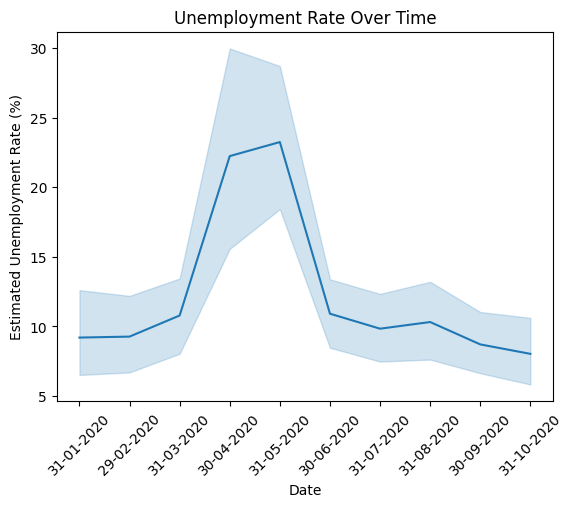

In [29]:
# a. Line plot showing unemployment rate over time
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

### b. Bar plot displaying average unemployment rate by state

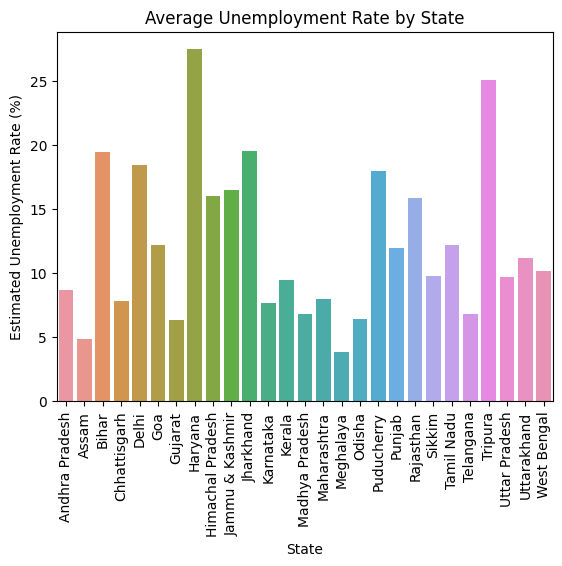

In [30]:
# b. Bar plot displaying average unemployment rate by state
state_avg_unemployment = df.groupby('State')['Estimated Unemployment Rate (%)'].mean().reset_index()
sns.barplot(x='State', y='Estimated Unemployment Rate (%)', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

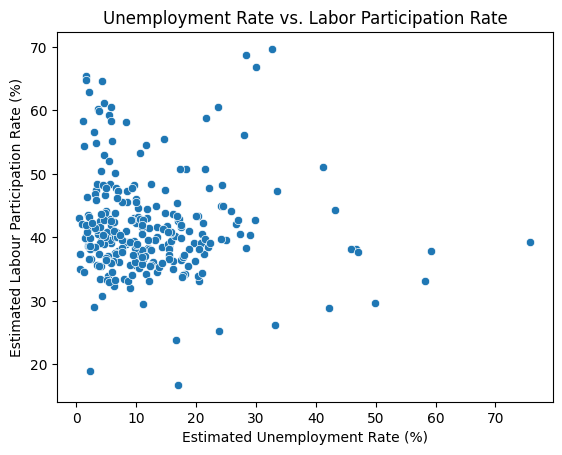

In [32]:
# c. Scatter plot showing the relationship between unemployment rate and labor participation rate
sns.scatterplot(x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)', data=df)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()

#### c. Scatter plot showing the relationship between unemployment rate and labor participation rate

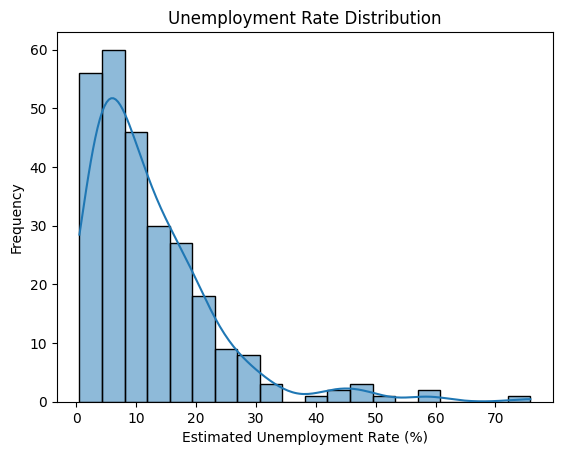

In [34]:
# d. Histogram of Unemployment Rate Distribution
sns.histplot(df['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

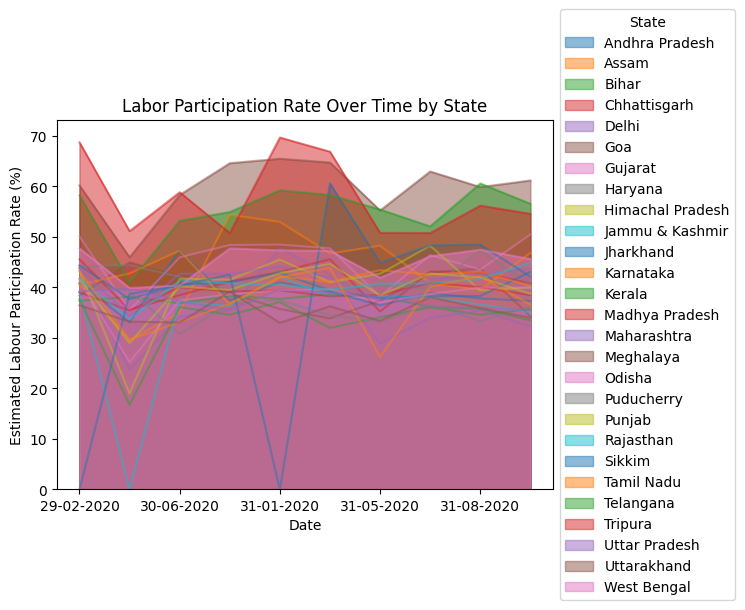

In [35]:
# e. Area Plot of Labor Participation Rate Over Time by State
state_area_labor_participation = df.pivot(index='Date', columns='State', values='Estimated Labour Participation Rate (%)')
state_area_labor_participation.plot(kind='area', stacked=False, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Labor Participation Rate Over Time by State')
plt.legend(title='State', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

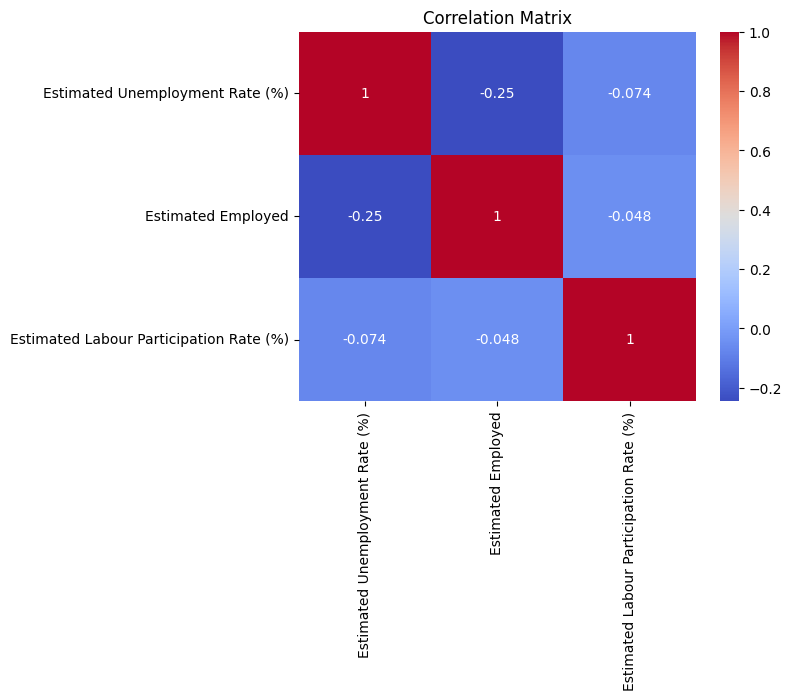

In [36]:
# f. Heatmap of Correlation Matrix
correlation_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

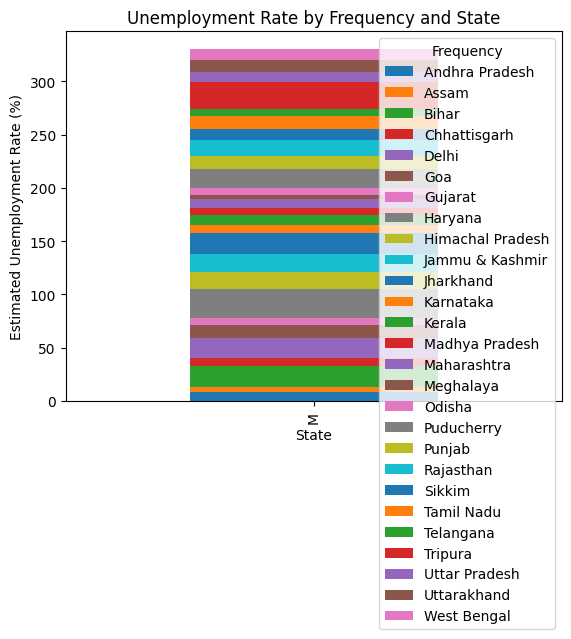

In [37]:
# g. Stacked Bar Plot of Unemployment Rate by Frequency and State
freq_state_unemployment = df.groupby(['Frequency', 'State'])['Estimated Unemployment Rate (%)'].mean().unstack()
freq_state_unemployment.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Frequency and State')
plt.legend(title='Frequency')
plt.show()

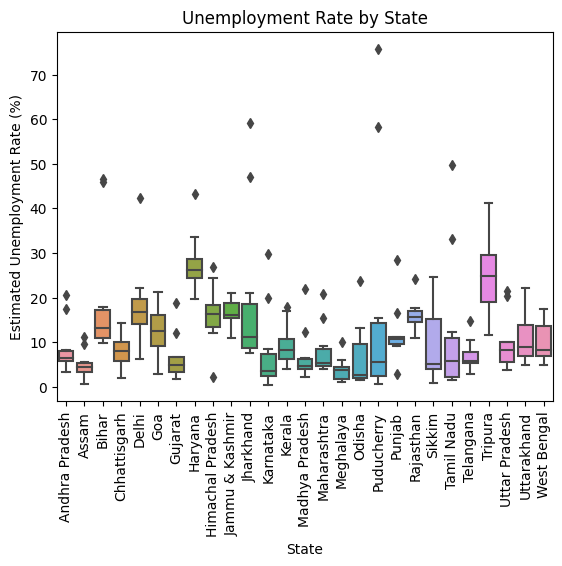

In [38]:
# h. Boxplot of Unemployment Rate by State
sns.boxplot(x='State', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by State')
plt.show()

### Conclusion:
The analysis reveals significant disparities in unemployment rates across different states in India, with Tripura facing the highest unemployment challenges and Meghalaya exhibiting the lowest rates. The visualizations highlight trends, distributions, and relationships between key economic indicators, providing valuable insights for policymakers and stakeholders to address unemployment issues effectively. Measures to boost labor participation, economic activities, and targeted interventions in high-unemployment states could help mitigate these challenges.